File data : https://www.kaggle.com/datasets/odins0n/ucf-crime-dataset?resource=download&select=Test

Test data:
Abuse: 297 files
Arrest: 3365 files
Arson: 2793 files
Assault: 2657 files
Burglary: 7657 files
Explosion: 6510 files
Fighting: 1231 files
NormalVideos: 64952 files
RoadAccidents: 2663 files
Robbery: 835 files
Shooting: 7630 files
Shoplifting: 7623 files
Stealing: 1984 files
Vandalism: 1111 files
---------------------
Train data:
Abuse: 19076 files
Arrest: 26397 files
Arson: 24421 files
Assault: 10360 files
Burglary: 39504 files
Explosion: 18753 files
Fighting: 24684 files
NormalVideos: 947768 files
RoadAccidents: 23486 files
Robbery: 41493 files
Shooting: 7140 files
Shoplifting: 24835 files
Stealing: 44802 files
Vandalism: 13626 files


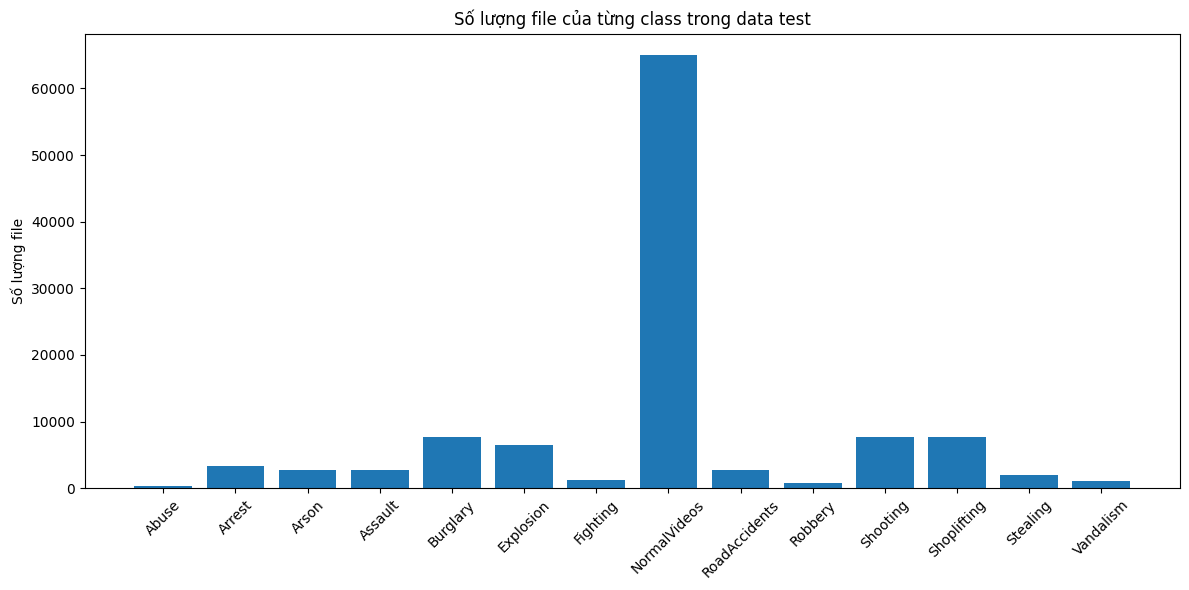

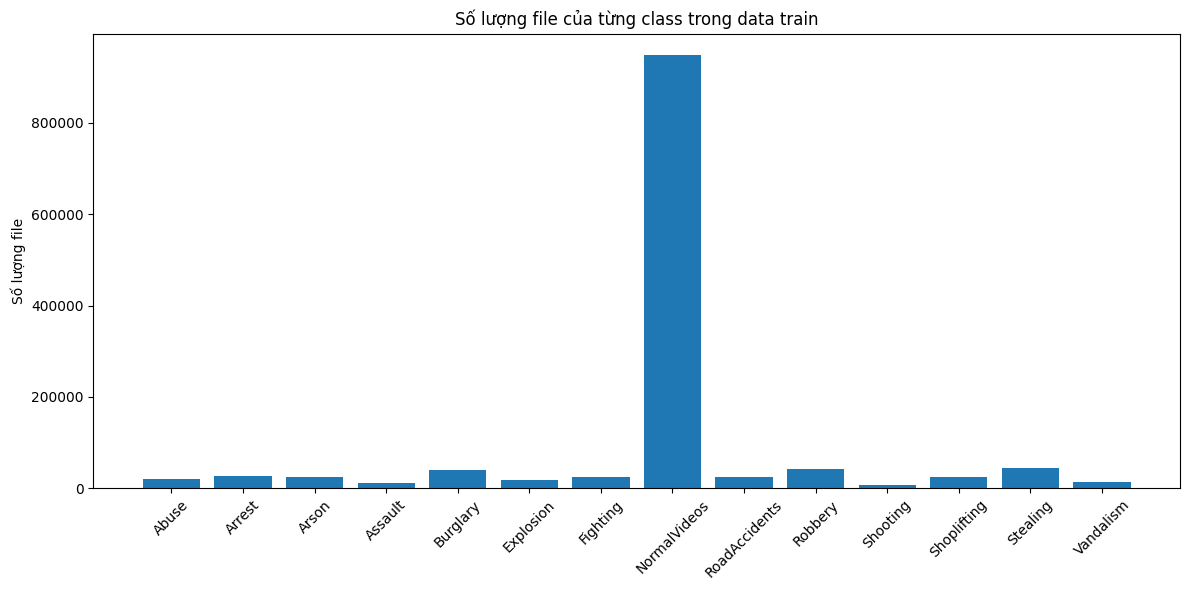

In [6]:
import os
import matplotlib.pyplot as plt

data_test_dir = "dataset/Test"
data_train_dir = "dataset/Train"
test_classes = os.listdir(data_test_dir)
train_classes = os.listdir(data_train_dir)
counts = []

print("Test data:")
for cls in test_classes:
    cls_dir = os.path.join(data_test_dir, cls)
    if os.path.isdir(cls_dir):
        num_files = len(os.listdir(cls_dir))
        counts.append(num_files)
        print(f"{cls}: {num_files} files")
print('---------------------')
print("Train data:")
for cls in train_classes:
    cls_dir = os.path.join(data_train_dir, cls)
    if os.path.isdir(cls_dir):
        num_files = len(os.listdir(cls_dir))
        counts.append(num_files)
        print(f"{cls}: {num_files} files")

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
plt.bar(test_classes, counts[:len(test_classes)])
plt.xticks(rotation=45)
plt.ylabel("Số lượng file")
plt.title("Số lượng file của từng class trong data test")
plt.tight_layout()
plt.show()

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
plt.bar(train_classes, counts[len(test_classes):])
plt.xticks(rotation=45)
plt.ylabel("Số lượng file")
plt.title("Số lượng file của từng class trong data train")
plt.tight_layout()
plt.show()

In [ ]:
import os
import shutil

train_dir = "dataset/Train"
test_dir = "dataset/Test"
output_dir = "data"

# Lấy danh sách class (thư mục con)
classes = os.listdir(train_dir)

for cls in classes:
    train_cls_dir = os.path.join(train_dir, cls)
    test_cls_dir = os.path.join(test_dir, cls)
    output_cls_dir = os.path.join(output_dir, cls)
    os.makedirs(output_cls_dir, exist_ok=True)
    
    # Copy file từ train
    if os.path.exists(train_cls_dir):
        for fname in os.listdir(train_cls_dir):
            shutil.copy(os.path.join(train_cls_dir, fname), os.path.join(output_cls_dir, fname))
    
    # Copy file từ test
    if os.path.exists(test_cls_dir):
        for fname in os.listdir(test_cls_dir):
            shutil.copy(os.path.join(test_cls_dir, fname), os.path.join(output_cls_dir, fname))

print("Đã gộp xong các thư mục!")

Đã gộp xong các thư mục!


In [ ]:
import os
import shutil

data_raw_dir = "data_raw"
unnormal_dir = "data/UnnormalVideos"
os.makedirs(unnormal_dir, exist_ok=True)

# Gộp các class unnormal vào UnnormalVideos nếu chưa gộp
classes = [cls for cls in os.listdir(data_raw_dir) if cls != "NormalVideos"]
unnormal_count = 0
for cls in classes:
    cls_dir = os.path.join(data_raw_dir, cls)
    files = os.listdir(cls_dir)
    unnormal_count += len(files)
    # Copy file sang UnnormalVideos
    for fname in files:
        src = os.path.join(cls_dir, fname)
        dst = os.path.join(unnormal_dir, f"{cls}_{fname}")  # Đổi tên để tránh trùng lặp
        if not os.path.exists(dst):  # Tránh copy lặp lại nếu đã chạy rồi
            shutil.copy(src, dst)
print(f"Đã gộp xong các class unnormal vào {unnormal_dir} với tổng số file: {unnormal_count}")

In [1]:
import os
import shutil

copy_dir = "data_raw/NormalVideos"
paste_dir = "data/NormalVideos"

shutil.copytree(copy_dir, paste_dir)
print("Đã copy xong NormalVideos!")

Đã copy xong NormalVideos!


Số file NormalVideos: 1012720
Số file UnnormalVideos: 364933


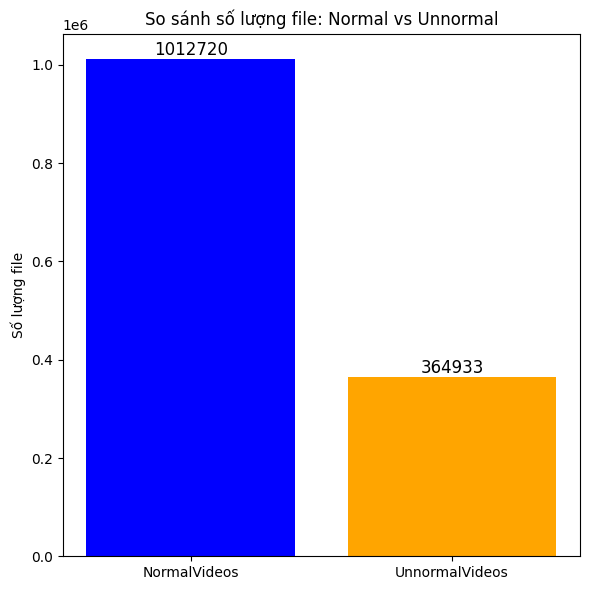

In [3]:
import matplotlib.pyplot as plt

data_dir = "data"
# Đếm số lượng file NormalVideos
normal_count = len(os.listdir(os.path.join(data_dir, "NormalVideos")))
unnormal_count = len(os.listdir(os.path.join(data_dir, "UnnormalVideos")))

print(f"Số file NormalVideos: {normal_count}")
print(f"Số file UnnormalVideos: {unnormal_count}")

# Trực quan hóa tương quan
labels = ["NormalVideos", "UnnormalVideos"]
counts = [normal_count, unnormal_count]

plt.figure(figsize=(6,6))
bars = plt.bar(labels, counts, color=["blue", "orange"])
plt.ylabel("Số lượng file")
plt.title("So sánh số lượng file: Normal vs Unnormal")
plt.tight_layout()

# Hiển thị số lượng file trên từng cột
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count), 
             ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
import os
import random
import shutil

# Đường dẫn đến thư mục NormalVideos
src_train_dir = "D:/22T_KHDL/PBL6/datasets/Train/NormalVideos"
dst_train_dir = "D:/22T_KHDL/PBL6/datasets/Train/NormalVideos_sampled"

# Số lượng file muốn lấy
train_sample_size = 50000

# Lấy danh sách file
all_files = os.listdir(src_train_dir)
sample_files = random.sample(all_files, train_sample_size)

# Tạo thư mục đích nếu chưa có
os.makedirs(dst_train_dir, exist_ok=True)

# Copy file mẫu sang thư mục mới
for fname in sample_files:
    shutil.copy(os.path.join(src_train_dir, fname), os.path.join(dst_train_dir, fname))

print(f"Sampled {train_sample_size} files to {dst_train_dir}")

In [ ]:
import os
import random
import shutil

# Đường dẫn đến thư mục NormalVideos
src_test_dir = "D:/22T_KHDL/PBL6/datasets/Test/NormalVideos"
dst_test_dir = "D:/22T_KHDL/PBL6/datasets/Test/NormalVideos_sampled"

# Số lượng file muốn lấy
test_sample_size = 100000

# Lấy danh sách file
all_files = os.listdir(src_test_dir)
sample_files = random.sample(all_files, test_sample_size)

# Tạo thư mục đích nếu chưa có
os.makedirs(dst_test_dir, exist_ok=True)

# Copy file mẫu sang thư mục mới
for fname in sample_files:
    shutil.copy(os.path.join(src_test_dir, fname), os.path.join(dst_test_dir, fname))

print(f"Sampled {test_sample_size} files to {dst_test_dir}")